In [1]:
package = "../../"
import sys
import os
package = os.path.abspath(package)
sys.path.append(package)


In [2]:
import numpy as np
import torch
import logging
import sys
import os
import pytest
import glob
from src.trainer.flux_kontext_trainer import FluxKontextLoraTrainer
from src.data.config import load_config_from_yaml
from src.data.dataset import loader

/home/lilong/.local/envs/myenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [3]:
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s | %(levelname)s | %(name)s: %(message)s",
    handlers=[logging.StreamHandler(sys.stdout)],
    force=True,  # 关键：覆盖已有配置
)
logger = logging.getLogger(__name__)
logger.info("it works")


2025-09-14 18:54:40,870 | INFO | __main__: it works


In [4]:
# IMAGE_PATH='/mnt/nas/public2/lilong/repos/qwen-image-finetune/.cache/control.png'
# prompt='change the image from the face to the face segmentation mask'
# import PIL
# prompt_image =PIL.Image.open(IMAGE_PATH).convert("RGB")
# IMAGE_PATH='/raid/lilong/data/face_seg/test/control_images/test_person.png'
IMAGE_PATH='/mnt/nas/public2/lilong/repos/qwen-image-finetune/.cache/test_input.png'

# prompt='change the image from the face to the face segmentation mask'
prompt='change the image from the face to the face segmentation mask'

import PIL
prompt_image =PIL.Image.open(IMAGE_PATH).convert("RGB")

In [5]:
prompt_image = prompt_image.resize((576,832))

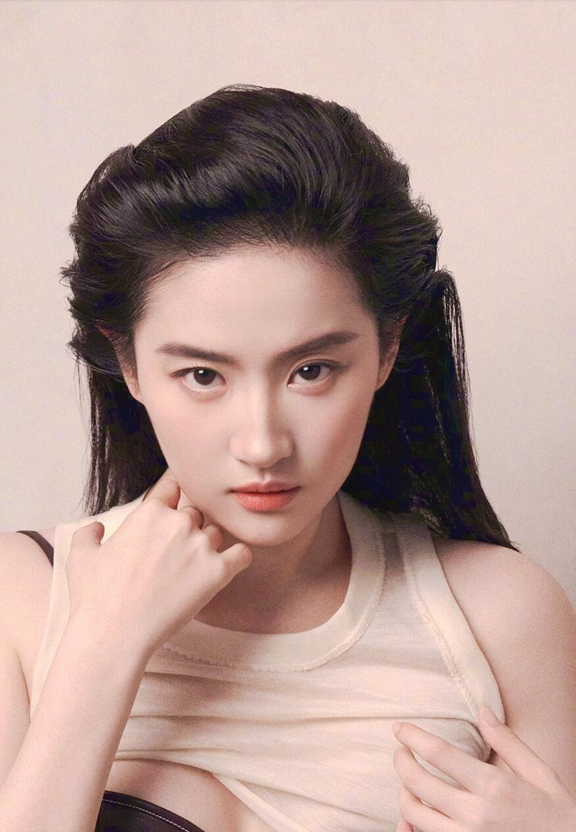

In [6]:
prompt_image

In [7]:
# prompt_image.save("/mnt/nas/public2/lilong/repos/qwen-image-finetune/.cache/test_input.png")

In [8]:
prompt_image.size

(576, 832)

In [13]:
LORA_WEIGHT='/raid/lilong/data/experiment/flux-kontext-face_seg_lora_fp16/face_segmentation_lora/v2/checkpoint-199-1000/model.safetensors'
# LORA_WEIGHT='/tmp/image_edit_lora/face_seg_flux_kontext_fp16/v0/checkpoint-599-1200/model.safetensors'
# LORA_WEIGHT='/tmp/image_edit_lora/faceSegFluxKontextFp16/v0/checkpoint-199-400/model.safetensors'
# LORA_WEIGHT='/tmp/image_edit_lora/face_seg_flux_kontext_fp16/v0/checkpoint-199-400/model.safetensors'
# LORA_WEIGHT='/tmp/image_edit_lora/face_seg_flux_kontext_fp16/v0/checkpoint-49-100/model.safetensors'
# LORA_WEIGHT='/tmp/image_edit_lora/faceSegFluxKontextFp4/v0/checkpoint-133-400/model.safetensors'

In [14]:
config="../../tests/test_configs/test_example_fluxkontext_fp4.yaml"
config="../../tests/test_configs/test_example_fluxkontext_fp16.yaml"
config='../../tests/test_configs/test_example_fluxkontext_fp_mix.yaml'
config = load_config_from_yaml(config)

config.model.lora.pretrained_weight = LORA_WEIGHT


In [15]:
trainer = FluxKontextLoraTrainer(config)


2025-09-14 18:54:58,964 | INFO | src.trainer.base_trainer: Batch Size: 8
2025-09-14 18:54:58,965 | INFO | src.trainer.base_trainer: Use Cache: True
2025-09-14 18:54:58,965 | INFO | root: ImageProcessor initialized with target_size: (832, 576)controls_size: [(832, 576)]


In [16]:
prompt_image.size[0],

(576,)

In [17]:

out = trainer.predict(
    prompt_image=prompt_image,
    prompt=prompt,
    num_inference_steps=20,
    true_cfg_scale=1.0,
    negative_prompt="",
    weight_dtype=torch.bfloat16,
    height=832,
    width=576,
    output_type='pil'
)
# save_path = 'tests/test_flux_kontext_trainer.png'
# save_path = os.path.abspath(save_path)

2025-09-14 18:55:02,830 | INFO | root: Loading model...
2025-09-14 18:55:02,831 | INFO | root: Loading FluxKontextPipeline and separating components...
2025-09-14 18:55:02,831 | INFO | src.models.flux_kontext_loader: Loading Flux Kontext VAE from black-forest-labs/FLUX.1-Kontext-dev
2025-09-14 18:55:04,130 | INFO | root: loaded vae from black-forest-labs/FLUX.1-Kontext-dev
2025-09-14 18:55:04,131 | INFO | src.models.flux_kontext_loader: Loading Flux Kontext CLIP encoder from black-forest-labs/FLUX.1-Kontext-dev
2025-09-14 18:55:04,967 | INFO | root: loaded text_encoder from black-forest-labs/FLUX.1-Kontext-dev
2025-09-14 18:55:04,968 | INFO | src.models.flux_kontext_loader: Loading Flux Kontext T5 encoder from black-forest-labs/FLUX.1-Kontext-dev


Loading checkpoint shards: 100%|██████████| 2/2 [00:00<00:00, 37.59it/s]

2025-09-14 18:55:05,564 | INFO | root: loaded text_encoder_2 from black-forest-labs/FLUX.1-Kontext-dev


2025-09-14 18:55:06,980 | INFO | src.models.flux_kontext_loader: Loading Flux Kontext tokenizers from eramth/flux-kontext-4bit-fp4


You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


2025-09-14 18:55:08,624 | INFO | src.models.flux_kontext_loader: Loading Flux Kontext scheduler from eramth/flux-kontext-4bit-fp4


Loading pipeline components...: 100%|██████████| 7/7 [00:10<00:00,  1.50s/it]

2025-09-14 18:55:19,764 | INFO | src.models.flux_kontext_loader: Successfully loaded Flux Kontext scheduler
2025-09-14 18:55:19,773 | INFO | root: Components loaded successfully. VAE scale factor: 8
2025-09-14 18:55:19,774 | INFO | root: load lora from pretrained weight
2025-09-14 18:55:19,832 | INFO | root: add_lora_adapter: LoraConfig(task_type=None, peft_type=<PeftType.LORA: 'LORA'>, auto_mapping=None, base_model_name_or_path=None, revision=None, inference_mode=False, r=16, target_modules={'to_v', 'to_k', 'to_q', 'to_out.0'}, exclude_modules=None, lora_alpha=16, lora_dropout=0.0, fan_in_fan_out=False, bias='none', use_rslora=False, modules_to_save=None, init_lora_weights='gaussian', layers_to_transform=None, layers_pattern=None, rank_pattern={}, alpha_pattern={}, megatron_config=None, megatron_core='megatron.core', trainable_token_indices=None, loftq_config={}, eva_config=None, corda_config=None, use_dora=False, use_qalora=False, qalora_group_size=16, layer_replication=None, runtime

2025-09-14 18:55:21,102 | INFO | root: set_lora: PEFT Loaded lora from /raid/lilong/data/experiment/flux-kontext-face_seg_lora_fp16/face_segmentation_lora/v2/checkpoint-199-1000/model.safetensors for lora_edit
2025-09-14 18:55:21,105 | INFO | root: missing keys: 1160, time_text_embed.timestep_embedder.linear_1.weight
2025-09-14 18:55:21,106 | INFO | root: set_lora: Loaded lora from /raid/lilong/data/experiment/flux-kontext-face_seg_lora_fp16/face_segmentation_lora/v2/checkpoint-199-1000/model.safetensors
2025-09-14 18:55:30,042 | INFO | root: setup_model_device_train_mode done


                                    Model Summary: model                                    
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Section     ┃ Metric                              ┃ Value                                ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Parameters  │ Total                               │ 5.97B                                │
│ Parameters  │ Trainable                           │ 0                                    │
│ Parameters  │ Trainable %                         │ 0.00%                                │
│ Parameters  │ Memory (total)                      │ 5.62 GB                              │
│ Parameters  │ Memory (trainable)                  │ 0 B                                  │
│ Modules     │ Total                               │ 3178                                 │
│ Modules     │ Leaf                                │ 2088                                 │
│ Modules     │ Parameterized                       │ 1036                                 │
│ Transformer │ Attention blocks (total/self/cross) │ 57/57/0                              │
│ Transformer │ Heads (hist)                        │ 24×57                                │
│ Transformer │ Attn hidden dim (hist)              │ 3072×57                              │
│ Transformer │ Norms                               │ LayerNorm×115, RMSNorm×152           │
│ Transformer │ FeedForward blocks                  │ 349                                  │
│ LoRA        │ Blocks                              │ 380                                  │
│ LoRA        │ Parameters                          │ 18.68M                               │
│ LoRA        │ Params % of total                   │ 0.31%                                │
│ LoRA        │ Ranks (hist)                        │ r=16×380                             │
│ LoRA        │ Rank min/max                        │ 16 / 16                              │
│ DTypes      │ dtype                               │ params(total/train) | % | mem(total) │
│ DTypes      │ fp4                                 │ 5.95B/0 | 99.64% | 5.54 GB           │
│ DTypes      │ fp32                                │ 18.68M/0 | 0.31% | 71.25 MB          │
│ DTypes      │ bf16                                │ 3.09M/0 | 0.05% | 5.88 MB            │
└─────────────┴─────────────────────────────────────┴──────────────────────────────────────┘

2025-09-14 18:55:30,247 | INFO | root: setup_predict done
image shape after preprocess torch.Size([3, 832, 576])
2025-09-14 18:55:30,300 | INFO | root: prepare_embeddings
tensor([[ 0.3730, -0.0120, -0.9023, -2.4688,  5.5625],
        [-3.4375, -3.0000,  0.6680, -1.6172, -5.3750],
        [ 4.2188,  8.8125, -4.6875,  0.8203, -4.4375],
        [ 0.3770, -0.0630,  0.1377,  0.4434, -8.9375],
        [ 1.9453, -4.0938, -0.8867, -6.3750, -4.8750]], device='cuda:1',
       dtype=torch.bfloat16) torch.bfloat16
t5 prompt ['change the image from the face to the face segmentation mask'] <class 'list'> 1
text_input_ids tensor([[ 483,    8, 1023,   45,    8,  522,   12,    8,  522, 5508,  257, 8181,
            1,    0,    0,    0,    0,    0,    0,    0]]) torch.Size([1, 512])
prompt_embeds tensor([[[ 0.0693,  0.0874, -0.0659,  ...,  0.0128, -0.1045,  0.0303],
         [ 0.0303, -0.0376, -0.0513,  ...,  0.1143, -0.1260,  0.0708],
         [ 0.0967,  0.0156, -0.0002,  ..., -0.0391,  0.1426, -0.0688

Flux Kontext Generation: 100%|██████████| 20/20 [00:13<00:00,  1.48it/s]


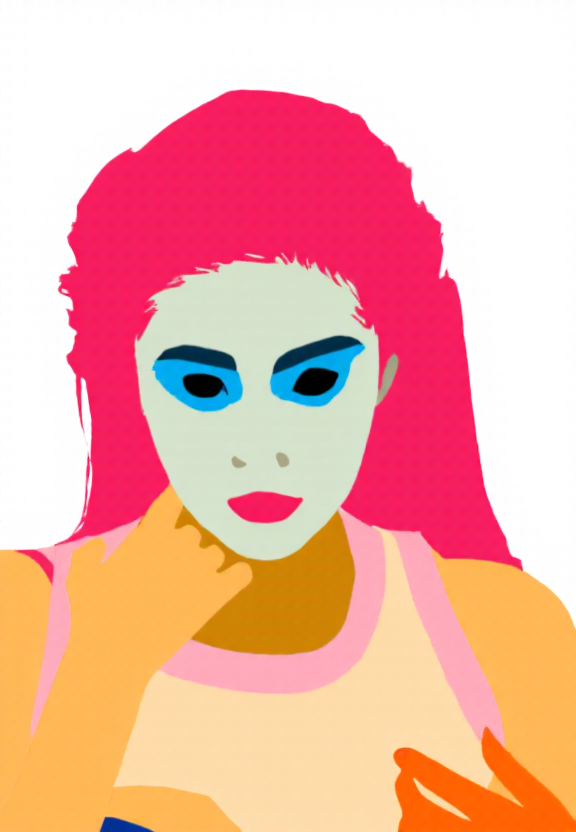

In [18]:
out[0]

In [30]:
data_dir='/mnt/nas/public2/lilong/repos/qwen-image-finetune/'

In [31]:
# compare contols

In [32]:
x1 = torch.load(os.path.join(data_dir, '.cache/processed_control.pt'), map_location='cpu')
x2 = torch.load(os.path.join(data_dir, '.cache/diffusers/image_after_process.pt'), map_location='cpu')
x1.shape, x2.shape, x1.min(), x1.max(), x2.min(), x2.max()


/tmp/ipykernel_3345875/4055048975.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  x1 = torch.load(os.path.join(data_dir, '.cache/processed_control.pt'), map_location='cp

(torch.Size([1, 3, 832, 576]),
 torch.Size([1, 3, 832, 576]),
 tensor(-0.9844, dtype=torch.bfloat16),
 tensor(1., dtype=torch.bfloat16),
 tensor(-0.9843),
 tensor(1.))

In [33]:
torch.norm(x1 - x2)/torch.norm(x1)

tensor(0.0027)

In [34]:
latent_ids_x = torch.load(os.path.join(data_dir, '.cache/latent_ids.pt'), map_location='cpu')
latent_ids_t = torch.load(os.path.join(data_dir, '.cache/diffusers/latent_ids.pt'), map_location='cpu')

/tmp/ipykernel_3345875/2661104997.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  latent_ids_x = torch.load(os.path.join(data_dir, '.cache/latent_ids.pt'), map_location=

In [35]:
(latent_ids_x-latent_ids_t).sum()

tensor(0., dtype=torch.bfloat16)

In [36]:
latent_ids_x.shape,latent_ids_t.shape

(torch.Size([3744, 3]), torch.Size([3744, 3]))

In [41]:
x = torch.load(os.path.join(data_dir, '.cache/timestep.pt'), map_location='cpu')
y = torch.load(os.path.join(data_dir, '.cache/diffusers/timestep.pt'), map_location='cpu')

/tmp/ipykernel_3345875/3757792929.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  x = torch.load(os.path.join(data_dir, '.cache/timestep.pt'), map_location='cpu')
/tmp/i

In [42]:
x,y

(tensor([1000.], dtype=torch.bfloat16), tensor([1000.], dtype=torch.bfloat16))

In [43]:
x = torch.load(os.path.join(data_dir, '.cache/control_latents.pt'), map_location='cpu')
y = torch.load(os.path.join(data_dir, '.cache/diffusers/image_latents.pt'), map_location='cpu')

/tmp/ipykernel_3345875/2941488314.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  x = torch.load(os.path.join(data_dir, '.cache/control_latents.pt'), map_location='cpu')

In [44]:
x.shape, y.shape

(torch.Size([1, 1872, 64]), torch.Size([1, 1872, 64]))

In [45]:
torch.norm(x-y)/torch.norm(x)

tensor(0.0376, dtype=torch.bfloat16)

In [46]:
x = torch.load(os.path.join(data_dir, '.cache/pooled_prompt_embeds.pt'), map_location='cpu')
y = torch.load(os.path.join(data_dir, '.cache/diffusers/pooled_prompt_embeds.pt'), map_location='cpu')

/tmp/ipykernel_3345875/1422788682.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  x = torch.load(os.path.join(data_dir, '.cache/pooled_prompt_embeds.pt'), map_location='

In [47]:
torch.norm(x-y)/torch.norm(x)

tensor(0., dtype=torch.bfloat16)

In [48]:
x = torch.load(os.path.join(data_dir, '.cache/prompt_embeds.pt'), map_location='cpu')
y = torch.load(os.path.join(data_dir, '.cache/diffusers/prompt_embeds.pt'), map_location='cpu')

/tmp/ipykernel_3345875/2783248741.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  x = torch.load(os.path.join(data_dir, '.cache/prompt_embeds.pt'), map_location='cpu')
/

In [49]:
torch.norm(x-y)/torch.norm(x)

tensor(0., dtype=torch.bfloat16)

In [50]:
x = torch.load(os.path.join(data_dir, '.cache/text_ids.pt'), map_location='cpu')
y = torch.load(os.path.join(data_dir, '.cache/diffusers/text_ids.pt'), map_location='cpu')

/tmp/ipykernel_3345875/623877130.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  x = torch.load(os.path.join(data_dir, '.cache/text_ids.pt'), map_location='cpu')
/tmp/ip

In [51]:
x.shape, y.shape

(torch.Size([512, 3]), torch.Size([512, 3]))

In [52]:
(x-y).sum()

tensor(0., dtype=torch.bfloat16)

In [53]:
x = torch.load(os.path.join(data_dir, '.cache/negative_pooled_prompt_embeds.pt'), map_location='cpu')
y = torch.load(os.path.join(data_dir, '.cache/diffusers/negative_pooled_prompt_embeds.pt'), map_location='cpu')
torch.norm(x-y)/torch.norm(x)

/tmp/ipykernel_3345875/324044565.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  x = torch.load(os.path.join(data_dir, '.cache/negative_pooled_prompt_embeds.pt'), map_lo

tensor(0., dtype=torch.bfloat16)

In [54]:
x = torch.load(os.path.join(data_dir, '.cache/negative_prompt_embeds.pt'), map_location='cpu')
y = torch.load(os.path.join(data_dir, '.cache/diffusers/negative_prompt_embeds.pt'), map_location='cpu')
torch.norm(x-y)/torch.norm(x)

/tmp/ipykernel_3345875/283421261.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  x = torch.load(os.path.join(data_dir, '.cache/negative_prompt_embeds.pt'), map_location=

tensor(0., dtype=torch.bfloat16)

In [55]:
x = torch.load(os.path.join(data_dir, '.cache/negative_text_ids.pt'), map_location='cpu')
y = torch.load(os.path.join(data_dir, '.cache/diffusers/negative_text_ids.pt'), map_location='cpu')
torch.norm(x-y)/(torch.norm(x)+1e-6)

/tmp/ipykernel_3345875/3803800931.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  x = torch.load(os.path.join(data_dir, '.cache/negative_text_ids.pt'), map_location='cpu

tensor(0., dtype=torch.bfloat16)

In [56]:
# timestep could be different